In [1]:
# Importing necessary libraries                        
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
# Reading data into a dataframe 
data = pd.read_csv('advertising.csv')

#understanding data


In [3]:
# Taking a look at the data
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.shape  #Shapes and Dimensions of the Data

(200, 4)

In [5]:
data.info()  # Datatype of the Columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.isnull().sum() # Checking for missing values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
data.describe()   # Statistical Summary of the Data.   

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
data.describe().T  # Transposing the Describe function.   

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [9]:
data.value_counts() # Counting repetition of unique values

TV     Radio  Newspaper  Sales
0.7    39.6   8.7        1.6      1
206.9  8.4    26.4       17.9     1
197.6  3.5    5.9        16.7     1
       23.3   14.2       16.6     1
198.9  49.4   60.0       23.7     1
                                 ..
97.5   7.6    7.2        13.7     1
100.4  9.6    3.6        10.7     1
102.7  29.6   8.4        14.0     1
104.6  5.7    34.4       10.4     1
296.4  36.3   100.9      23.8     1
Name: count, Length: 200, dtype: int64

# Exploring The Data

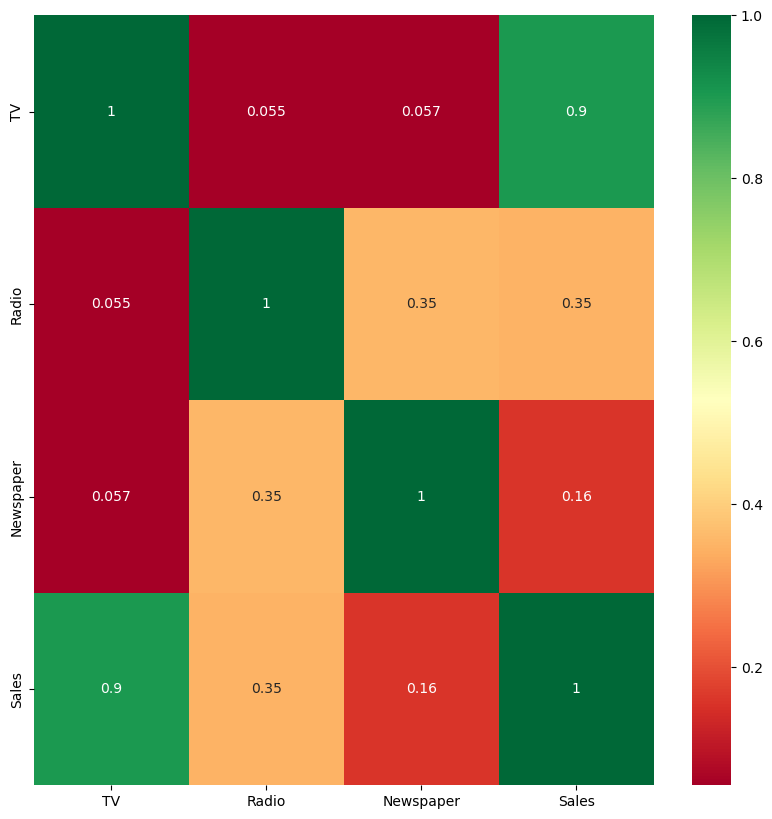

In [10]:
import matplotlib.pyplot as plt
corrmat = data.corr()                        #pariwise correlation of all the columns 
corr_features = corrmat.index            #  Select all columns from the dataset
plt.figure(figsize = (10,10))

#heatmap of the data

g = sns.heatmap(data[corr_features].corr(),annot = True, cmap="RdYlGn") # annot present values in the blocks. cmap = colormap 

In [11]:
data.corr().T

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


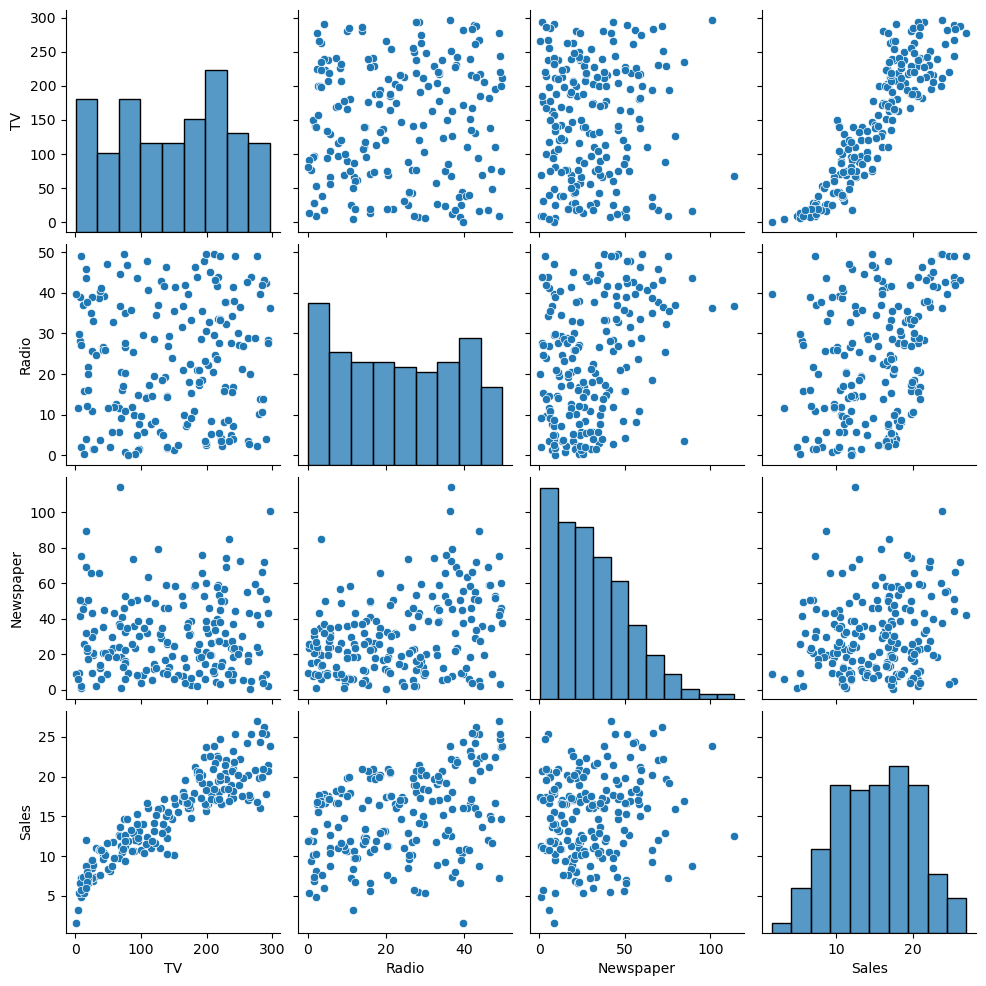

In [12]:
# Pair plot of correlation

import seaborn as sns
sns.pairplot(data)

# Checking Relationship between Sales and TV

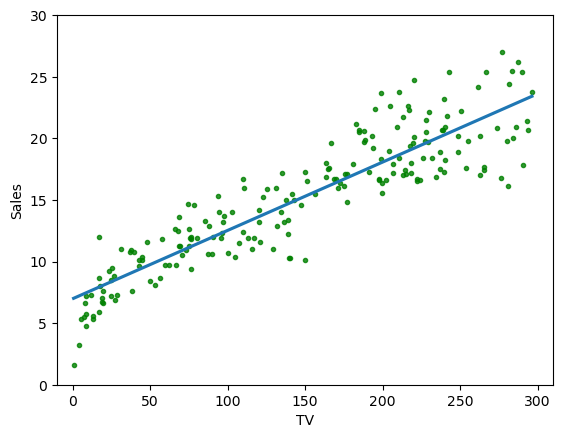

In [13]:
# Checking Relationship between Sales and TV
sns.regplot(x=data['TV'], y=data['Sales'], order=1, ci=None, scatter_kws={'color':'g', 's':9})   # 's':9 denote the size of dots. 
plt.xlim(-10,310)                                                                 
plt.ylim(0,30)                                                                # y axis values are start from 0 
#plt.ylim(bottom=0)
plt.show() 

# Checking Relationship between Sales and Radio

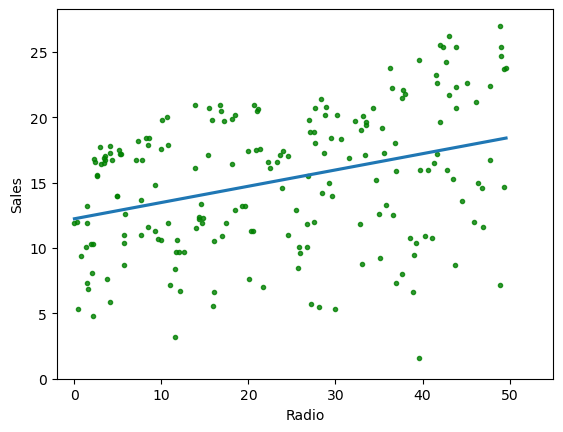

In [14]:
# Checking Relationship between Sales and Radio
sns.regplot(x=data['Radio'], y=data['Sales'], order=1, ci=None, scatter_kws={'color':'g', 's':9})    
plt.xlim(-2,55)
plt.ylim(bottom=0)   
#plt.ylim(0,30)      
plt.show()

# Checking The Relationship between Sales and Newspaper

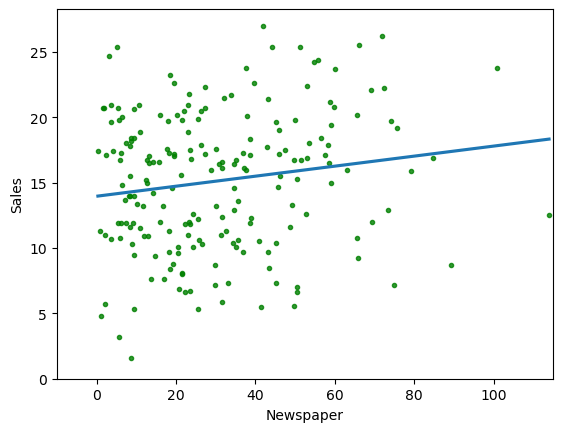

In [15]:
sns.regplot(x=data['Newspaper'], y=data['Sales'], order=1, ci=None, scatter_kws={'color':'g', 's':9}) 
plt.xlim(-10,115)  
#plt.ylim(0,30)      
plt.ylim(bottom=0)
plt.show()

# Model Building

In [16]:
import sklearn
import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression
X = data.TV.values.reshape(-1, 1)
y = data.Sales
tv_model = skl_lm.LinearRegression()
tv_model.fit(X,y)
LinearRegression()

LinearRegression()

# Model Evaluation

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
Sales_pred = tv_model.predict(X)
mean_squared_error(y, Sales_pred)                      # Evaluating by Mean Squared Error.

5.2177438977951285

In [18]:
# Evaluating by RSME
Sales_pred = tv_model.predict(X)
mse = mean_squared_error(y, Sales_pred)
# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)


In [19]:
Sales_pred = tv_model.predict(X)                       
r2_score = r2_score(y, Sales_pred)                                # Evaluating by R2 Score.

In [20]:
# Printing results of all evaluation metrics used
print("Mean Squared Error(MSE):", mse)
print("Root Mean Squared Error(MSE):", rmse)
print("R2_score:", r2_score)

Mean Squared Error(MSE): 5.2177438977951285
Root Mean Squared Error(MSE): 2.2842381438447106
R2_score: 0.8121757029987414


# Performing Residual Analysis to further evaluate model performance

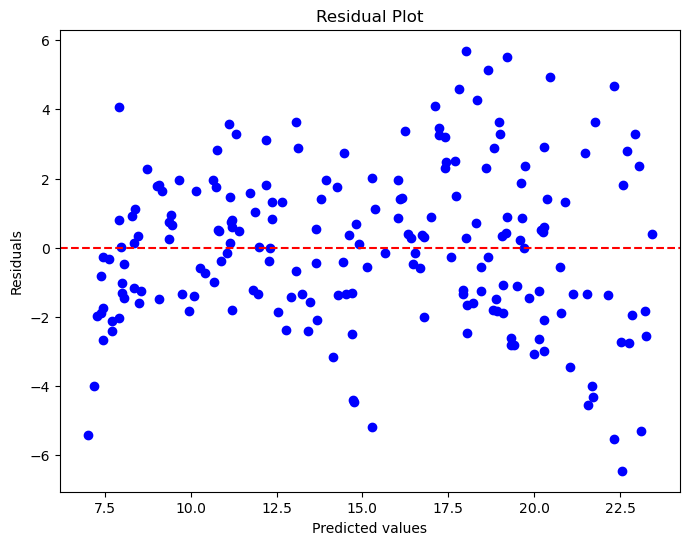

In [21]:
# Performing residual analysis
# Calculate the residuals
y_pred = tv_model.predict(X)
residuals = y - y_pred

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()


# Predicting sales based on model

In [27]:
# Predicting Sales based on a new TV advertising expenditure
new_tv_ad = 270
predicted_sales = tv_model.predict(np.array(new_tv_ad).reshape(1, -1))

print(f"Predicted Sales for TV advertising expenditure of {new_tv_ad}: {predicted_sales[0]}")

Predicted Sales for TV advertising expenditure of 270: 21.950309515010787
